In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [3]:
# Load the datasets
file_2022 = r"C:\Users\Joseph\Desktop\School\Masters Data Science\Applied Data Science\AQI Data\annual_conc_by_monitor_2022.csv"
file_2023 = r"C:\Users\Joseph\Desktop\School\Masters Data Science\Applied Data Science\AQI Data\annual_conc_by_monitor_2023.csv"
file_2024 = r"C:\Users\Joseph\Desktop\School\Masters Data Science\Applied Data Science\AQI Data\annual_conc_by_monitor_2024.csv"

In [4]:
data_2022 = pd.read_csv(file_2022)
data_2023 = pd.read_csv(file_2023)
data_2024 = pd.read_csv(file_2024)

In [5]:
# Combine datasets
combined_data = pd.concat([data_2022, data_2023, data_2024], ignore_index=True)

In [6]:
# Filter the data for PM2.5 and approved methods
approved_methods = [
    'Teledyne T640 at 5.0 LPM w/Network Data Alignment enabled - Broadband spectroscopy',
    'Teledyne T640X at 16.67 LPM w/Network Data Alignment enabled - Broadband spectroscopy'
]
pm25_data = combined_data[
    (combined_data['Parameter Code'] == 88101) & 
    (combined_data['Method Name'].isin(approved_methods))
]

In [7]:
# Select relevant columns
columns_to_keep = [
    'State Code', 'County Code', 'Latitude', 'Longitude',
    'Parameter Name', 'Arithmetic Mean', 'State Name', 'County Name', 'City Name'
]
pm25_filtered = pm25_data[columns_to_keep]

In [8]:
# Save cleaned data
pm25_filtered.to_csv('pm25_cleaned_data.csv', index=False)

C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


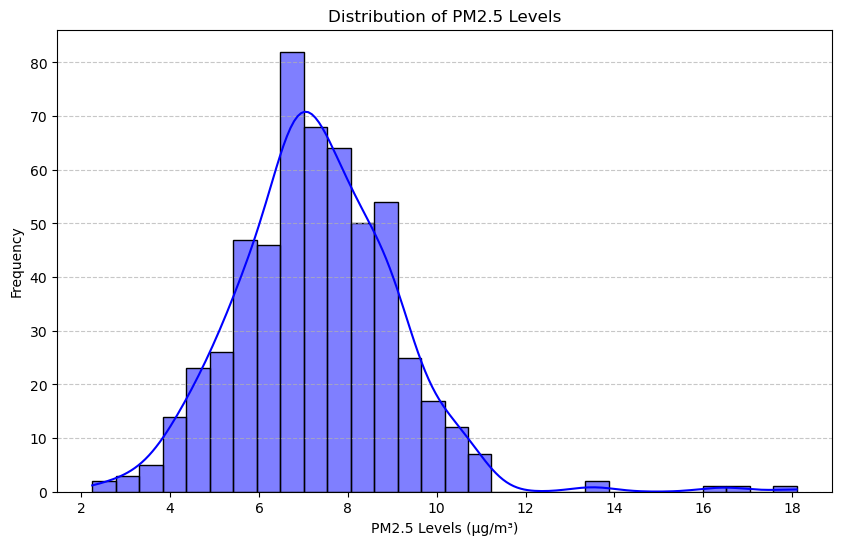

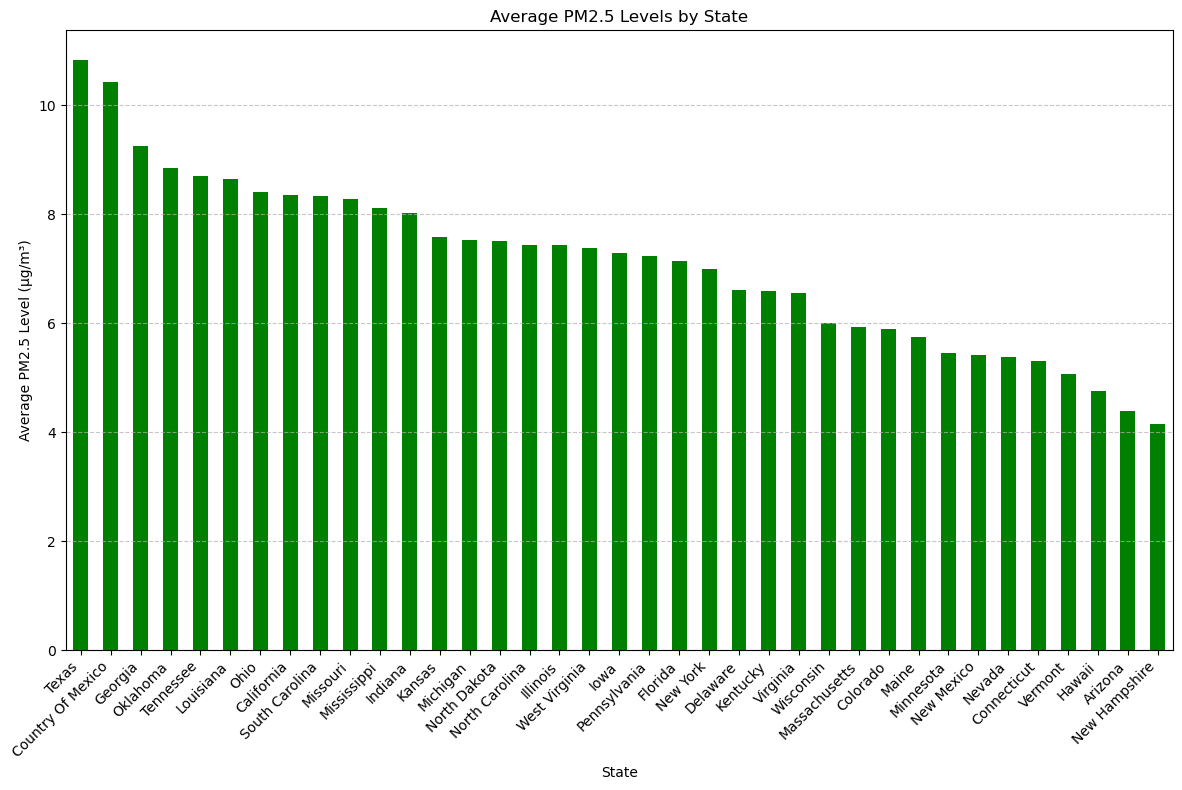

In [9]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(pm25_filtered['Arithmetic Mean'], bins=30, kde=True, color='blue')
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5 Levels (µg/m³)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

state_avg_pm25 = pm25_filtered.groupby('State Name')['Arithmetic Mean'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
state_avg_pm25.plot(kind='bar', color='green')
plt.title('Average PM2.5 Levels by State')
plt.xlabel('State')
plt.ylabel('Average PM2.5 Level (µg/m³)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

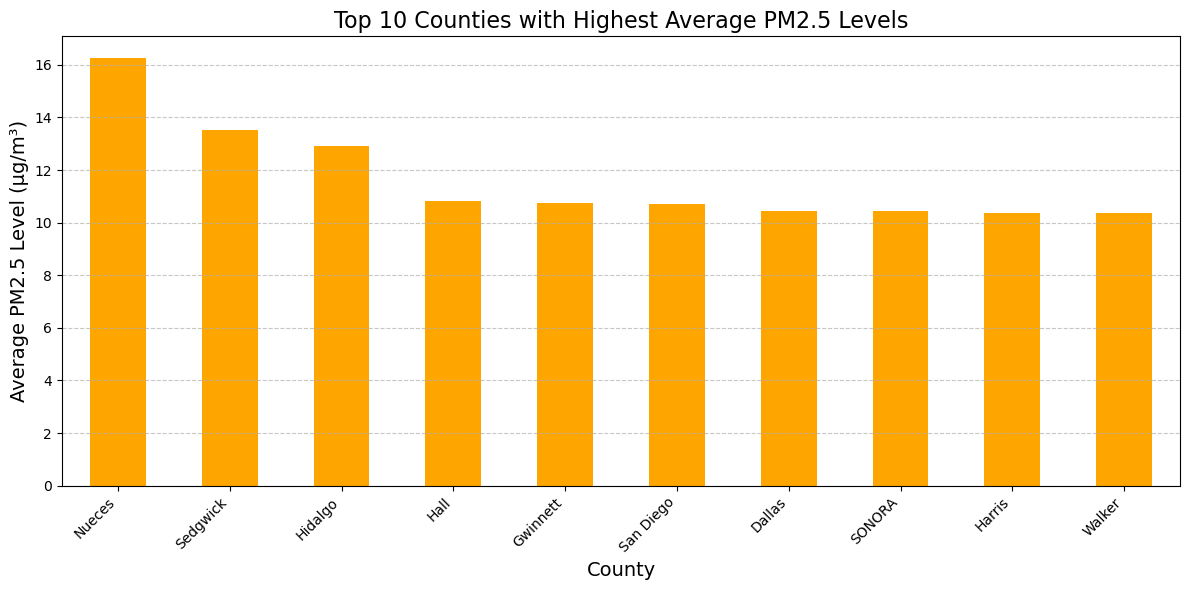

In [11]:
# Top 10 Counties with Highest Average PM2.5 Levels
county_avg_pm25 = pm25_filtered.groupby('County Name')['Arithmetic Mean'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
county_avg_pm25.plot(kind='bar', color='orange')
plt.title('Top 10 Counties with Highest Average PM2.5 Levels', fontsize=16)
plt.xlabel('County', fontsize=14)
plt.ylabel('Average PM2.5 Level (µg/m³)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
# Modeling
pm25_filtered = pm25_filtered.dropna(subset=['Arithmetic Mean'])
X = pm25_filtered[['State Code', 'County Code', 'Latitude', 'Longitude']]
y = pm25_filtered['Arithmetic Mean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}, R² Score: {r2}")

RMSE: 1.0114694981769146, R² Score: 0.5807530557595728


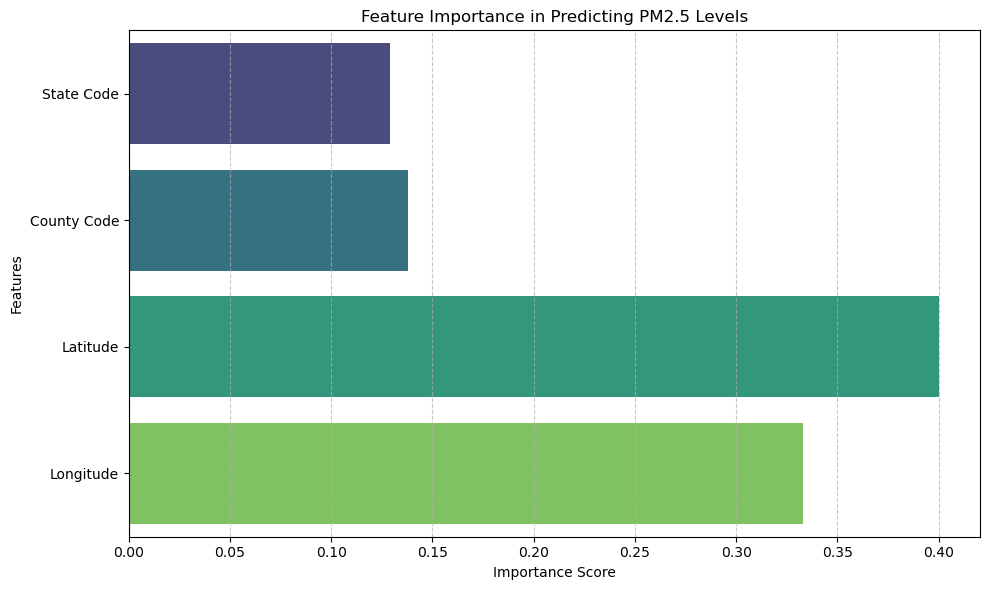

In [12]:
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns, palette='viridis')
plt.title('Feature Importance in Predicting PM2.5 Levels')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

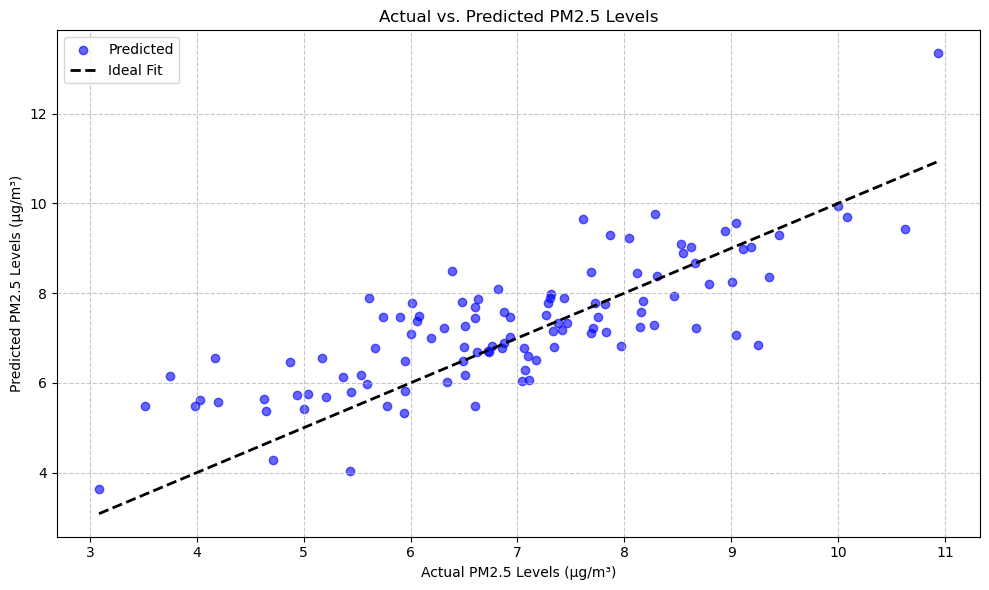

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.title('Actual vs. Predicted PM2.5 Levels')
plt.xlabel('Actual PM2.5 Levels (µg/m³)')
plt.ylabel('Predicted PM2.5 Levels (µg/m³)')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()